# Final project of the course Machine Learning with Python 2021

For the final project, it is asked to create a client list. There is a data set with information over the profit and damage caused by 5000 russian customers. Then there is another data set with a list of applicants. The goal is to create a list of 200 customers that offers a balance between the anticipated damages and profit. There is a recommended list of 5 steps that could be used (but it is not obligatory to follow), to have the list. A minimal solution was also offered to serve as a guide and to reduce ambiguity. 

Possible steps:
1) prepare the data set

    • briefly survey the data
    • deal with data issues:
    • appropriately handle categorical data
    • treat missing data
    • identify outliers, and choose whether or not to make your analysis more robust by removing these.

2) predict the projected revenue per clients

    • choose an algorithm, and train it in an optimal way
    • score the 500 applicants

3) predict which clients will cause damage

    • choose an algorithm, and train it in an optimal way
    • score the 500 applicants

4) for those that will wreak havoc, predict the amount of damage they will cause

    • choose an algorithm, and train it in an optimal way
    • score the 500 applicants

5) create a measure of the expected value of each applicant, and create an optimal selection of 200 guests

For the development of the project it was decided to use the proposed steps and and use the solution as a guide, to build upon it. Also, as the team was working on the code at the same time, a Github repository was created to facilitate this. The first step that was carried out was Preprocessing the data.

## 1. Preprocessing de data

First of all, the libraries need to be imported. 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import animation as ani, pyplot as plt
import seaborn as sns #pretty graphics R style

from IPython.display import HTML
plt.style.use('seaborn-darkgrid')
from sklearn.inspection import permutation_importance
import matplotlib as mpl 
import matplotlib.pyplot as plt #graphics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler #library for the rescaling
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from treeinterpreter import treeinterpreter as ti, utils
import joblib
import getpass
from pathlib import Path

To avoid changing the directory everytime a different team member ran the code, the following was created:

In [27]:
if getpass.getuser() == 'daniel':
    project_root_path = Path("//home/daniel/Projects/Python ML Pipeline")
    data_raw_path = project_root_path / 'data' / 'raw'
    data_output_path = project_root_path / 'data' / 'processed'
    # Lets read the training dataset
    data_train = pd.read_csv(data_raw_path / 'train_V2.csv')
    # Now we read the data set of the potential clients
    score = pd.read_csv(data_raw_path /  'score.csv')
    # We read the dictonary
    dict_features = pd.read_csv(data_raw_path /  'dictionary.csv', delimiter=';', header=None)
    
elif getpass.getuser() == 'maart':
    project_root_path = Path("C:/Users/maart/Machine Learning/ML-in-Python/")
    data_raw_path = project_root_path / 'data' / 'raw'
    data_output_path = project_root_path / 'data' / 'processed'
    # Lets read the trining dataset
    data_train = pd.read_csv(data_file_path+'train_V2.csv')
    # Now we read the training data set
    score = pd.read_csv(data_file_path+'score.csv')
    dict_features_path = data_file_path+'dictionary.csv'
    dict_features = pd.read_csv(dict_features_path, delimiter=';', header=None)
    
else:
    project_root_path = Path("C:/Users/mhinojosalee/Documents/GitHub/ML-in-Python")
    data_raw_path = project_root_path / 'data' / 'raw'
    data_output_path = project_root_path / 'data' / 'processed'
    # Lets read the training dataset
    data_train = pd.read_csv(data_raw_path / 'train_V2.csv')
    # Now we read the data set of the potential clients
    score = pd.read_csv(data_raw_path /  'score.csv')
    # We read the dictonary
    dict_features = pd.read_csv(data_raw_path /  'dictionary.csv', delimiter=';', header=None)
   

Some visualization tasks were carried out to get more acquintence with the data. This information can be consulted in====>>>>>

Now, lets show the data set columns as it is, with their columns.

In [4]:
data_train.shape
pd.options.display.max_columns = None
data_train.head()


,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,True,2.0,1.0,28936.0,37.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,476.0,40.0,0.0,0.0,0.0,209.0,M,0.000000,0.0,0.0,0.0,0.467768,0.98334,NaN,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,True,3.0,0.0,16674.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,2.0,0.0,0.0,0.0,4.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True,4.0,0.0,32552.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,95.0,8.0,0.0,0.0,0.0,6.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,0.232375,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,True,8.0,1.0,32252.0,37.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,NaN,NaN,0.0,0.0,0.0,4.0,V,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,False,2.0,1.0,29605.0,26.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,354.0,30.0,0.0,0.0,0.0,3.0,V,1454.210627,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00


In the next part, Describe() will be used. This allows to see some statistical details from each column in pandas (pandas is a tool for the manipulation of data).  This includes the mean, the standard deviation, quartiles, min, max.

In [5]:
data_train.describe()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,shop_am,shop_use,retired,gold_status,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
count,4947.000000,4947.000000,4947.000000,4954.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4970.000000,4999.000000,4912.000000,4947.000000,4947.000000,4761.000000,4947.000000,4947.000000,4947.000000,4912.000000,4912.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4608.000000,4608.000000,4947.000000,4947.000000,4973.000000,4947.000000,4947.000000,4912.000000,4947.000000,4947.000000,1.225000e+03,1.314000e+03,1.209000e+03,1.304000e+03,1.261000e+03,1.367000e+03,1.223000e+03,1.324000e+03,1.232000e+03,1493.000000,5000.000000,5000.000000,5000.000000
mean,2281.260158,696.057712,3637.900950,145.952967,0.352335,3298.716394,0.041237,0.024661,0.094199,0.390944,0.401811,0.024205,6.051507,5.646250,0.287043,32778.558916,44.901152,0.495452,0.883970,0.049267,0.004275,1.298565,0.213463,0.889832,0.252678,0.102486,1.960986,0.385082,273.111545,22.780165,0.018597,0.218314,121.078826,28.992521,403.019960,0.151873,0.182131,0.034769,4.997356e-01,5.003663e-01,4.985522e-01,4.967340e-01,4.942801e-01,4.985876e-01,4.962065e-01,5.013962e-01,5.009593e-01,5.192953,1967.310930,0.255400,189.970736
std,8365.254507,3051.119275,5726.625669,581.068095,0.889449,4549.646039,0.198858,0.155107,0.292134,0.488011,0.490313,0.153700,3.112104,5.052513,0.452427,6858.671948,16.225094,0.500030,0.320293,0.216447,0.065252,0.800831,0.826006,0.313130,0.434592,0.303317,0.805545,0.832933,152.498416,12.719429,0.135111,0.712408,1783.146726,37.480510,1335.935144,0.358934,0.385991,0.183212,2.879255e-01,2.887168e-01,2.877572e-01,2.897994e-01,2.899165e-01,2.877292e-01,2.886538e-01,2.876226e-01,2.901323e-01,3.159868,1371.061266,0.436129,379.005941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,-7.871775,10.680000,0.000000,0.000000
25%,229.000000,0.000000,1638.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,28630.000000,31.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,154.000000,13.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.520205e-01,2.510338e-01,2.521282e-01,2.454209e-01,2.405574e-01,2.495061e-01,2.474100e-01,2.506703e-01,2.514905e-01,3.124958,1333.320000,0.000000,0.000000
50%,469.000000,52.000000,1889.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,5.000000,0.000000,31990.000000,45.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,271.000000,23.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,4.974162e-01,4.986215e-01,4.987791e-01,4.985832e-01,4.942465e-01,5.016458e-01,4.933486e-01,5.020603e-01,5.029121e-01,5.188006,1721.235000,0.000000,0.000000
75%,1688.000000,810.000000,3165.500000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,9.000000,8.000000,1.000000,35924.000000,57.000000,1.000000,1.00

The next part was done just to see what happened if we deleted the missing values. It was left just for information but it was decided to not just drop missing values.

In [6]:
# total = data_train.isnull().sum().sort_values(ascending=False)
# percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
# (data_train.isnull().sum(axis=1))[data_train.isnull().sum(axis=1) > 30]
# table
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# print(missing_data.head(30))
# print(data_train['score2_pos'].value_counts())
# data_train = data_train.drop((missing_data[missing_data['Percent'] > 0.30]).index,1)
# data_train.dropna(inplace=True) 
#we could drop all that is NaN, but we will loose observations. (4425, 43) instead of (4425, 43) 

After this, the preprocessing will actually start. But first, it is important to understand that what is done in the training data set, has to also be done also in the score data set. For this, both data set will be fused, but the outcomes need to be dropped.

In [7]:
print(data_train.columns)
data_feat = data_train.drop(['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'], axis=1)
print(data_feat.shape)

Index(['income_am', 'profit_last_am', 'profit_am', 'damage_am', 'damage_inc',
       'crd_lim_rec', 'credit_use_ic', 'gluten_ic', 'lactose_ic',
       'insurance_ic', 'spa_ic', 'empl_ic', 'cab_requests', 'married_cd',
       'bar_no', 'sport_ic', 'neighbor_income', 'age', 'marketing_permit',
       'urban_ic', 'dining_ic', 'presidential', 'client_segment', 'sect_empl',
       'prev_stay', 'prev_all_in_stay', 'divorce', 'fam_adult_size',
       'children_no', 'tenure_mts', 'tenure_yrs', 'company_ic', 'claims_no',
       'claims_am', 'nights_booked', 'gender', 'shop_am', 'shop_use',
       'retired', 'gold_status', 'score1_pos', 'score1_neg', 'score2_pos',
       'score2_neg', 'score3_pos', 'score3_neg', 'score4_pos', 'score4_neg',
       'score5_pos', 'score5_neg', 'outcome_profit', 'outcome_damage_inc',
       'outcome_damage_amount'],
      dtype='object')
(5000, 50)


Then categorical features were chosen. In the next part, the different values of each of them are counted.

In [8]:
print(score.shape)
datafull = pd.concat([data_feat, score])
print(datafull.shape)
print(datafull['client_segment'].value_counts())
print(datafull['sect_empl'].value_counts())
print(datafull['gender'].value_counts())
print(datafull['retired'].value_counts())
print(datafull['gold_status'].value_counts())
print(datafull['prev_stay'].value_counts())
print(datafull['divorce'].value_counts())
print(datafull['married_cd'].value_counts())

(500, 50)
(5500, 50)
1.0    3712
2.0     925
0.0     352
3.0     329
4.0      87
5.0      38
Name: client_segment, dtype: int64
0.0    4820
1.0     468
6.0      78
2.0      45
4.0      29
3.0       3
Name: sect_empl, dtype: int64
M    2734
V    2709
Name: gender, dtype: int64
0.0    4456
1.0     987
Name: retired, dtype: int64
0.0    5241
1.0     202
Name: gold_status, dtype: int64
1.0    4848
0.0     595
Name: prev_stay, dtype: int64
0.0    4884
1.0     559
Name: divorce, dtype: int64
True     4460
False    1040
Name: married_cd, dtype: int64


For the variables, a mode imputation was done instead of making a separate missing category. A disadvantage is that the most frequent value will be favored. But every technique, has its downfalls.

In [9]:
# datafull['client_segment'] = pd.Categorical(datafull['client_segment'])
# datafull['sect_empl'] = pd.Categorical(datafull['sect_empl'])
# datafull['retired'] = pd.Categorical(datafull['retired'])
# datafull['gold_status'] = pd.Categorical(datafull['gold_status'])
# datafull['prev_stay'] = pd.Categorical(datafull['prev_stay'])
# datafull['divorce'] = pd.Categorical(datafull['divorce'])

impute_mode = SimpleImputer (strategy='most_frequent')
for cols in ['client_segment', "credit_use_ic", "gluten_ic", "lactose_ic","insurance_ic","marketing_permit", "presidential", "urban_ic", "prev_all_in_stay", "shop_use", 
             "company_ic", "dining_ic", "spa_ic","sport_ic","empl_ic",'sect_empl', "retired", "gold_status", "prev_stay", 'divorce', "gender"]:  
      datafull[cols] = impute_mode.fit_transform(datafull[[cols]])

The categorical features that had values different from 0 and 1, were dummified (separated in categories) 

In [10]:
datafull['client_segment'] = pd.Categorical(datafull['client_segment'])
datafull['sect_empl'] = pd.Categorical(datafull['sect_empl'])
# The NaN categorie won't be necessary anymore, thanks to the mode imputing.
pd.get_dummies(datafull[['client_segment', 'sect_empl']], dummy_na=False).head()
print(datafull.shape)
datafull2 = pd.concat([datafull,pd.get_dummies(datafull[['gender','client_segment', 'sect_empl']], dummy_na=False)], axis=1)
print(datafull2.shape)
print(datafull2.head(1000))     

(5500, 50)
(5500, 64)
     income_am  profit_last_am  profit_am  damage_am  damage_inc  crd_lim_rec  \
0        227.0             0.0     3201.0      888.0         6.0      15000.0   
1        268.0            16.0     1682.0        0.0         0.0        750.0   
2        283.0            23.0     1673.0        0.0         0.0        750.0   
3        227.0             0.0     1685.0        0.0         0.0          0.0   
4       4091.0          1028.0     3425.0      785.0         2.0      14000.0   
..         ...             ...        ...        ...         ...          ...   
995     3103.0             0.0     9466.0     1206.0         2.0      12500.0   
996        NaN             NaN        NaN        NaN         NaN          NaN   
997      250.0           823.0     1646.0        0.0         0.0       1500.0   
998     6382.0           561.0     7265.0        0.0         0.0       1500.0   
999     5556.0          2464.0     2464.0        0.0         0.0          0.0   

     

After creating the dummies for the necessary variables, the original features and 1 dummy category was dropped in each of them. Also a new  feature, "profit per night" was created.

In [11]:
datafull2.drop(['client_segment', 'sect_empl', 'gender', 'client_segment_5.0','sect_empl_6.0','gender_V'], axis=1, inplace=True)
datafull2.shape

datafull2['profitpernight'] = datafull2['profit_am'] / datafull2['nights_booked']

Now the data with over 25% missing values will be found. Most of it consist in the features related to scores. The solution dropped them, but we decided to try another option.

In [12]:
(datafull2.isnull().mean())[datafull2.isnull().mean() > 0.25]

score1_pos    0.755091
score1_neg    0.736727
score2_pos    0.760000
score2_neg    0.740364
score3_pos    0.746000
score3_neg    0.725091
score4_pos    0.756000
score4_neg    0.736364
score5_pos    0.752000
score5_neg    0.700545
dtype: float64

Something important that was mentioned during class was that sometimes it is not worthy to use very complex methods like soft imputing to avoid dropping features with missing values. So we decided to try something simple: a mean imputing. The scores are quantitative, and of course, a downside of this is that it could bring us distortion.

In [13]:
impute_quant = SimpleImputer (strategy='mean')
for cols in ['score1_pos', 'score1_neg', 'score2_pos', 'score2_neg', 'score3_pos',
       'score3_neg', 'score4_pos', 'score4_neg', 'score5_pos', 'score5_neg']:  # Missing data, Scores are quantitative
      datafull2[cols] = impute_quant.fit_transform(datafull2[[cols]])

Then the missing values per row were dropped (observations). But there were not observations with this percentage of missing values.

In [14]:
print(datafull2.shape)
datafull2.dropna(thresh = datafull2.shape[1]*0.25, axis = 0, inplace = True)
print(datafull2.shape)


(5500, 59)
(5500, 59)


After this, a mean imputation was done for the other missing values that could be present (here the binary data was already treated before). And at the end there was not more missing data.

In [15]:
print(datafull2.isnull().sum().sum())
datafull2.fillna(datafull2.mean(), inplace=True)
print(datafull2.isnull().sum().sum())

2033
0


In the next section, the features will be rescaled.

In [16]:
scaler = StandardScaler()
datafull3 = pd.DataFrame(scaler.fit_transform(datafull2))
datafull3.columns = datafull2.columns


Then, the score and the train datasets will be separated and the outcome features will be reinstated.

In [17]:
data_train = pd.concat([data_train[['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount']],datafull3[0:5000]], axis=1)
print(data_train.shape)
score = datafull3[5000:5500] #The score dataset will be the last 500 observations
score.shape

(5000, 62)


(500, 59)

## 2. Profit Model

After the preprocessing, the data was split in train and test. The test size was decided to be 20%, so that more data was available for the training.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'],1),
                                                    data_train['outcome_profit'], test_size=0.2, random_state=48)

The model for profit will try 500 random hyperparameter combinations, each time using 5 Cross Validation folds, totalling 2500 fits. It takes a while to run (around 40 minutes).

In [44]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
learning_rate = [x for x in np.logspace(start = -3, stop = -0.01, num = 50)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [2, 5, 10, 30]
min_samples_leaf = [1, 2, 4, 10, 30]
subsample = [0.4, 0.6, 0.8, 1]
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'subsample': subsample}
gbm = GradientBoostingRegressor()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 500, cv = 5, verbose=2, random_state=42, n_jobs = -1)
gbm_random.fit(X_train, y_train)
gbm_random.best_params_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


{'subsample': 0.8,
 'n_estimators': 430,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 5,
 'learning_rate': 0.05111771456150691}

In the next section the model is pickled. The reason is to not let all that time that the model took to run, to get wasted. It is a way to persist it.

In [45]:
score.to_pickle(data_output_path / "score_v3.pkl")
data_train.to_pickle(data_output_path / "data_train_v3.pkl")
joblib.dump(gbm_random, 'random_search_gbm.pkl')

['random_search_gbm.pkl']

Then the output is examined.

In [46]:
pd.DataFrame(gbm_random.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.159382,0.142743,0.011209,0.001630,0.8,816,5,4,auto,1,0.001524,"{'subsample': 0.8, 'n_estimators': 816, 'min_s...",0.517796,0.428397,0.564310,0.441821,0.422409,0.474947,0.056296,450
1,55.179324,1.516909,0.057923,0.007774,1,797,30,10,auto,8,0.009469,"{'subsample': 1, 'n_estimators': 797, 'min_sam...",0.668674,0.737092,0.848470,0.784049,0.809775,0.769612,0.062107,54
2,8.050236,0.682453,0.021875,0.003711,0.4,706,30,30,auto,3,0.001524,"{'subsample': 0.4, 'n_estimators': 706, 'min_s...",0.546434,0.347508,0.484488,0.575905,0.535528,0.497973,0.080813,444
3,4.974917,0.521505,0.014106,0.004617,0.8,155,2,10,auto,4,0.136683,"{'subsample': 0.8, 'n_estimators': 155, 'min_s...",0.611202,0.745050,0.848443,0.766840,0.799261,0.754159,0.079504,125
4,36.194635,1.229288,0.048087,0.005692,0.8,908,30,10,auto,5,0.002323,"{'subsample': 0.8, 'n_estimators': 908, 'min_s...",0.656806,0.657463,0.825246,0.742043,0.758383,0.727988,0.064220,209


After this, the best hyperparameter combination is inspected. 

In [47]:
pd.DataFrame(gbm_random.cv_results_).loc[pd.DataFrame(gbm_random.cv_results_)['mean_test_score'].idxmax()]

mean_fit_time                                                      15.183627
std_fit_time                                                        0.880788
mean_score_time                                                     0.023346
std_score_time                                                      0.005868
param_subsample                                                          0.8
param_n_estimators                                                       430
param_min_samples_split                                                    2
param_min_samples_leaf                                                     1
param_max_features                                                      auto
param_max_depth                                                            5
param_learning_rate                                                 0.051118
params                     {'subsample': 0.8, 'n_estimators': 430, 'min_s...
split0_test_score                                                   0.757655

Finally, the best parameters are used to fit the model

In [48]:
params = gbm_random.best_params_
gbm_profit = GradientBoostingRegressor(**params)
gbm_profit.fit(X_train, y_train)
# I got R2: 0.975 for the X_train and R2: 0.829 for the X_test
print('R2: %.3f' % gbm_profit.score(X_train, np.array(y_train).reshape(-1,1)))
print('R2: %.3f' % gbm_profit.score(X_test, np.array(y_test).reshape(-1,1))) #Here we are using the "holdout" set already

R2: 0.975
R2: 0.829


And in the last point, the potential clients are scored with the model, and this is saved.

In [49]:
profit_preds = gbm_profit.predict(score)


In [50]:
np.save(data_output_path / "profit_preds_v3.pkl", profit_preds)


Then a way to "whitebox" the model was tried. For it, the variables that mattered were identified using Variable importances based on impurity reduction.


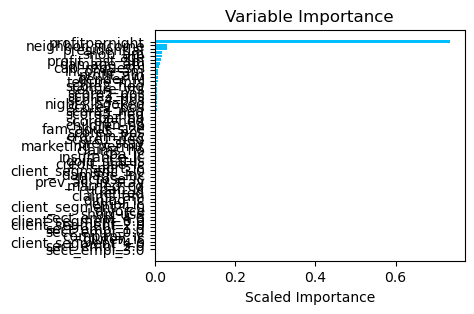

In [51]:
gbm_profit.feature_importances_.sum()
d = {'feature':X_train.columns, 'importance':gbm_profit.feature_importances_}
importances = pd.DataFrame(data=d)
importances.sort_values('importance', ascending=False,inplace=True)

plt.rcdefaults()
plt.rcParams['figure.figsize'] = (4, 3)
fig, ax = plt.subplots()
variables = importances.feature
y_pos = np.arange(len(variables))
scaled_importance = importances.importance
ax.barh(y_pos, scaled_importance, align='center', color='deepskyblue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()


This graphic is unorganized. All the variables are shown in the y axis, it is difficult to read them. So it were orgaized in the next section.

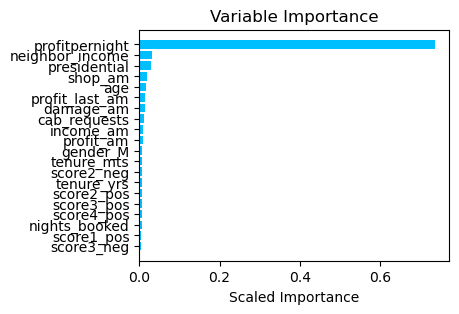

In [52]:
importances2 = importances.copy()
importances2 = importances2.head(20)
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams['figure.figsize'] = (4, 3)
fig, ax = plt.subplots()
variables = importances2.feature
y_pos = np.arange(len(variables))
scaled_importance = importances2.importance
ax.barh(y_pos, scaled_importance, align='center', color='deepskyblue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()
# And now we have a nice plot

After this, Permutation importance was used. As it can be seen, Feature importance and Permutation importance identify the same strongly predictive features for the model for Profit: Profit per night, Mean taxable income of neighborhood, Presidential suit previous use, and the amount spent in shop, but in different order (for permutation the Presidential suit use and the amount spent on shop come higher than the neighborhood income).

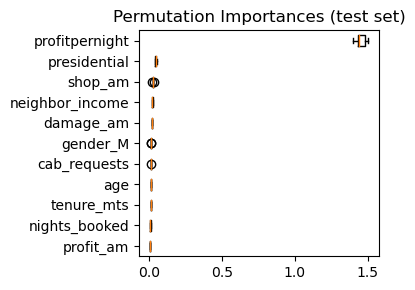

In [56]:
imp = permutation_importance(gbm_profit, X_train, y_train,n_repeats=10,
                                random_state=42, n_jobs=2)



sorted_idx = imp.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(imp.importances[sorted_idx][48:59].T, vert=False, labels=X_train.columns[sorted_idx][48:59])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

## 3. Prediction of damage (binary)

In [57]:
data_train.outcome_damage_inc.value_counts()

0    3723
1    1277
Name: outcome_damage_inc, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'],1), 
                                                    data_train['outcome_damage_inc'], test_size=0.2, random_state=9876)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
learning_rate = [x for x in np.logspace(start = -3, stop = -0.01, num = 50)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [2, 5, 10, 30]
min_samples_leaf = [1, 2, 4, 10, 30]
subsample = [0.4, 0.6, 0.8, 1]
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'subsample': subsample}
gbm = GradientBoostingClassifier()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=4872, n_jobs = -1)
gbm_random.fit(X_train, y_train)
gbm_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'subsample': 0.6,
 'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 4,
 'learning_rate': 0.004075717570257835}

In [59]:
params = gbm_random.best_params_
gbm_damagebin = GradientBoostingClassifier(**params)
gbm_damagebin.fit(X_train, y_train)
print('Train accuracy: %.3f' % gbm_damagebin.score(X_train, y_train))
print('Test accuracy: %.3f' % gbm_damagebin.score(X_test, y_test))

Train accuracy: 0.797
Test accuracy: 0.740


# Option 2: Hist gradient boosting classifier
Now let's see if we have better results using the Histogram Gradiënt Boosting Classifier.

In [21]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'],1), 
                                                    data_train['outcome_damage_inc'], test_size=0.2, random_state=9876)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
learning_rate = [x for x in np.logspace(start = -3, stop = -0.01, num = 50)]
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_leaf = [1, 2, 4, 10, 30]
random_grid = {'learning_rate': learning_rate,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
hgbm = HistGradientBoostingClassifier()
hgbm_random = RandomizedSearchCV(estimator = hgbm, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=4872, n_jobs = -1)
hgbm_random.fit(X_train, y_train)
hgbm_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


{'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.05882905020160562}

In [29]:
params = hgbm_random.best_params_
hgbm_damagebin = GradientBoostingClassifier(**params)
hgbm_damagebin.fit(X_train, y_train)
print('Train accuracy: %.3f' % hgbm_damagebin.score(X_train, y_train))
print('Test accuracy: %.3f' % hgbm_damagebin.score(X_test, y_test))

Train accuracy: 0.812
Test accuracy: 0.736


In [30]:
damagebin_preds = hgbm_damagebin.predict_proba(score)
np.save(data_output_path / "damagebin_preds_v4.pkl", damagebin_preds)


ValueError: could not convert string to float: 'V'